
# EKG ML Model - Project Work

---
Loyola University Chicago  
COMP 379-001/479-001, Spring 2025, Machine Learning  
Instructor: Daniel Moreira (dmoreira1@luc.edu)  
Branch version author: Marissa Bui

---

Needed libraries:

* NumPy (https://numpy.org/)
* Pandas (https://pandas.pydata.org/)
* Scikit-learn (https://scikit-learn.org/)
* matplotlib (https://matplotlib.org/)

References:
* 12-lead electrocardiogram database paper (https://figshare.com/collections/_/4560497)


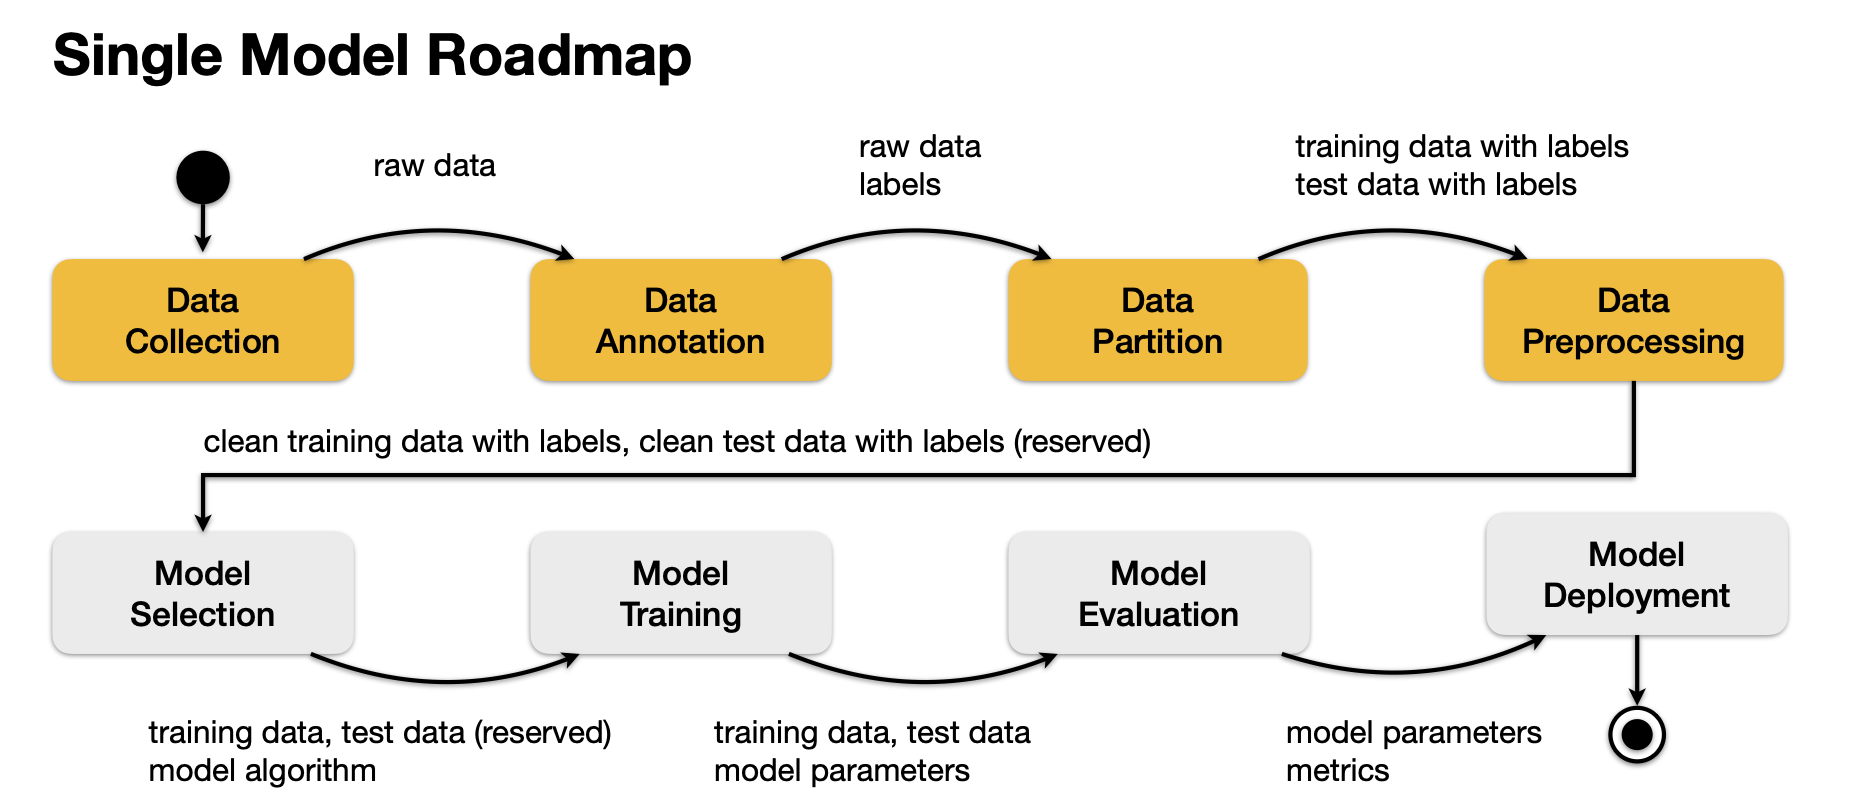

### Data Partition

#### Set up

- Dataset columns according to documentation
- The shape, how unique the contents are, etc. = helpful

In [1]:
# Importing Libraries

import numpy as np
print('NumPy version', np.__version__)

import pandas as pd
print('Pandas version', pd.__version__)

import matplotlib
print('Matplotlib version', matplotlib.__version__)

import sklearn
print('SciKit version', sklearn.__version__)

import seaborn as sns
print('Seaborn version', sns.__version__)


NumPy version 2.0.2
Pandas version 2.2.2
Matplotlib version 3.10.0
SciKit version 1.6.1
Seaborn version 0.13.2


In [2]:
# loads the dataset into memory
df_diagnostics = pd.read_csv('/content/Diagnostics.csv')

# adds headers to the dataset according to documentation
df_diagnostics.columns = [
    'FileName', 'Rhythm', 'Beat', 'PatientAge', 'Gender', 'VentricularRate',
    'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected',
    'RAxis', 'TAxis', 'QRSCount', 'QOnset','QOffset','TOffset']

# prints info
print('Data shape:', df_diagnostics.shape)
print('Labels, Label count:', np.unique(df_diagnostics['FileName'], return_counts=True))
print()

# first 10 samples
df_diagnostics.head(10)

Data shape: (10646, 16)
Labels, Label count: (array(['MUSE_20180111_155115_19000', 'MUSE_20180111_155154_74000',
       'MUSE_20180111_155203_15000', ..., 'MUSE_20181222_204310_31000',
       'MUSE_20181222_204312_58000', 'MUSE_20181222_204314_78000'],
      dtype=object), array([1, 1, 1, ..., 1, 1, 1]))



,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
5,MUSE_20180112_120347_79000,SB,NONE,46,FEMALE,57,57,70,404,393,38,24,9,225,260,427
6,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395
7,MUSE_20180209_172046_21000,SR,NONE,46,MALE,63,63,90,376,384,24,38,11,221,266,409
8,MUSE_20180114_075128_92000,SB,NONE,45,MALE,59,59,84,390,386,78,68,10,218,260,413
9,MUSE_20180118_174026_42000,SB,NONE,47,FEMALE,58,58,80,420,412,80,48,10,212,252,422


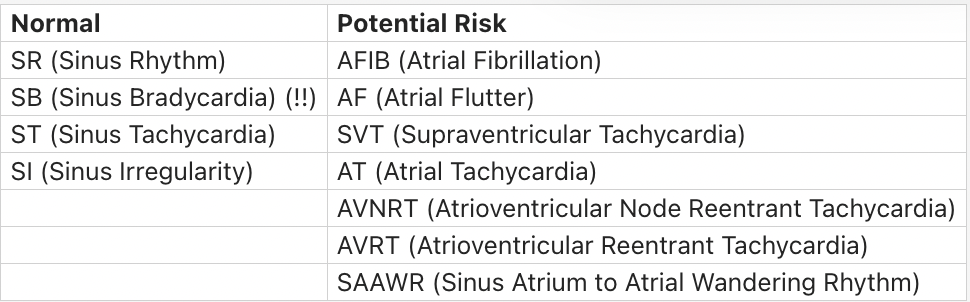

In [3]:
sorted(df_diagnostics['Rhythm'].unique())

['AF', 'AFIB', 'AT', 'AVNRT', 'AVRT', 'SA', 'SAAWR', 'SB', 'SR', 'ST', 'SVT']

In [4]:
# Display count the occurrences of each rhythm
rhythm_counts = df_diagnostics['Rhythm'].value_counts()
sorted_rhythm_counts = rhythm_counts.sort_index()
print(sorted_rhythm_counts)

Rhythm
AF        445
AFIB     1780
AT        121
AVNRT      16
AVRT        8
SA        399
SAAWR       7
SB       3889
SR       1826
ST       1568
SVT       587
Name: count, dtype: int64


#### Check for Missing Values

Methods:
- Feature/Sample Drop: Remove the whole rows or columns with missing values.
- Value Replacement: Estimate and replace the value using the mean, median, or mode.

In [5]:
# No need to deal with missing values
df_diagnostics.isnull().sum()

,0
FileName,0
Rhythm,0
Beat,0
PatientAge,0
Gender,0
VentricularRate,0
AtrialRate,0
QRSDuration,0
QTInterval,0
QTCorrected,0


##### Feature Drop (column)

Columns removed
* Beat: many beat labels which would create too many features (also not necessary to examine at this stage)
* FileName: not necessary to examine at this stage. <-- could add in eventually for increased complexity

In [6]:
df_diagnostics.columns

Index(['FileName', 'Rhythm', 'Beat', 'PatientAge', 'Gender', 'VentricularRate',
       'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected', 'RAxis',
       'TAxis', 'QRSCount', 'QOnset', 'QOffset', 'TOffset'],
      dtype='object')

In [7]:
# drop unnecessary columns
df_diagnostics = df_diagnostics.drop(columns=['Beat'])
df_diagnostics = df_diagnostics.drop(columns=['FileName'])

'''
MAY DROP IN FUTURE IF NEEDED (to limit features)

df_diagnostics = df_diagnostics.drop(columns=['QTInterval'])
df_diagnostics = df_diagnostics.drop(columns=['QTCorrected'])
df_diagnostics = df_diagnostics.drop(columns=['RAxis'])
df_diagnostics = df_diagnostics.drop(columns=['TAxis'])
df_diagnostics = df_diagnostics.drop(columns=['QOnset'])
df_diagnostics = df_diagnostics.drop(columns=['QOffset'])
df_diagnostics = df_diagnostics.drop(columns=['TOffset'])

'''
df_diagnostics.shape

(10646, 14)



#### Split using Scikit Learn

- Reference: [Scikit learn train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
)

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

# strips X and y values
X = df_diagnostics.values[:, 1:]  # All rows, all columns except the rhythm labels
y = df_diagnostics.values[:, 0].reshape((len(X),1))   # All rows, rhythm column

# split configuration
test_size = 0.2   # % saved for tests
random_seed = 0   # save the seed for reproducibility

# data split
X_train, X_test, y_train, y_test =\
  train_test_split(X, y,
                   random_state=random_seed,
                   test_size=test_size,
                   stratify=y) # NOTE: NEED TO STRATIFY Y OR NO????

# data split info
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (8516, 13)
X_test shape: (2130, 13)
y_train shape: (8516, 1)
y_test shape: (2130, 1)


In [9]:
# converting to Pandas dataframe format
df_y_train = pd.DataFrame(y_train)

# add column labels
df_y_train.columns = df_diagnostics.columns[:1]
df_y_train

,Rhythm
0,SB
1,SB
2,SR
3,SB
4,SB
...,...
8511,SB
8512,SB
8513,SB
8514,SB


In [10]:
# converting to Pandas dataframe format
df_X_train = pd.DataFrame(X_train)

# add column labels
df_X_train.columns = df_diagnostics.columns[1:]
df_X_train

,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,73,MALE,58,58,84,416,408,3,36,10,224,266,432
1,64,MALE,44,44,94,562,480,21,0,8,215,262,496
2,35,FEMALE,82,82,84,368,429,89,46,13,227,269,411
3,63,FEMALE,52,52,88,440,409,-29,7,9,213,257,433
4,69,MALE,58,58,112,406,398,78,57,10,220,276,423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,48,FEMALE,57,57,78,414,402,50,36,9,220,259,427
8512,68,MALE,51,51,124,426,392,48,21,8,216,278,429
8513,77,MALE,57,57,102,492,478,-19,10,10,222,273,468
8514,49,FEMALE,54,54,104,484,458,59,45,9,219,271,461


## Data Preprocessing
1. Accounting for Categorical data (nominal/ordinal) with one-hot encoding
2. Checking for Missing Values (already done before partition)
3. Data Normalization <-- Note: requirement depends on model

### For X_train & X_test Data
- With rhythm labels as y, only column to encode = Gender

In [11]:
print(list(df_X_train.columns))
sorted(df_X_train['Gender'].unique())

['PatientAge', 'Gender', 'VentricularRate', 'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected', 'RAxis', 'TAxis', 'QRSCount', 'QOnset', 'QOffset', 'TOffset']


['FEMALE', 'MALE']

In [12]:
# needed libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(categories='auto', drop='first')
transformer = ColumnTransformer([ ('onehot', encoder, [1]),
                               ('keep', 'passthrough', [0,2,3,4,5,6,7,8,9,10,11,12])])
X_train_transf = transformer.fit_transform(X_train).astype(float)
X_test_transf = transformer.transform(X_test).astype(float) # no fit


# updated labels with 'FEMALE' dropped and rest replaced
new_columns = ['Male'] + list(df_X_train.columns[:1]) + list(df_X_train.columns[2:])

df_X_train_transf = pd.DataFrame(X_train_transf)
df_X_train_transf.columns = new_columns
display(df_X_train_transf)

df_X_test_transf = pd.DataFrame(X_test_transf)
df_X_test_transf.columns = new_columns
display(df_X_test_transf)

,Male,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,1.0,73.0,58.0,58.0,84.0,416.0,408.0,3.0,36.0,10.0,224.0,266.0,432.0
1,1.0,64.0,44.0,44.0,94.0,562.0,480.0,21.0,0.0,8.0,215.0,262.0,496.0
2,0.0,35.0,82.0,82.0,84.0,368.0,429.0,89.0,46.0,13.0,227.0,269.0,411.0
3,0.0,63.0,52.0,52.0,88.0,440.0,409.0,-29.0,7.0,9.0,213.0,257.0,433.0
4,1.0,69.0,58.0,58.0,112.0,406.0,398.0,78.0,57.0,10.0,220.0,276.0,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,0.0,48.0,57.0,57.0,78.0,414.0,402.0,50.0,36.0,9.0,220.0,259.0,427.0
8512,1.0,68.0,51.0,51.0,124.0,426.0,392.0,48.0,21.0,8.0,216.0,278.0,429.0
8513,1.0,77.0,57.0,57.0,102.0,492.0,478.0,-19.0,10.0,10.0,222.0,273.0,468.0
8514,0.0,49.0,54.0,54.0,104.0,484.0,458.0,59.0,45.0,9.0,219.0,271.0,461.0


,Male,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,1.0,68.0,56.0,44.0,116.0,498.0,480.0,7.0,60.0,9.0,220.0,278.0,469.0
1,1.0,67.0,56.0,56.0,92.0,430.0,414.0,31.0,41.0,9.0,219.0,265.0,434.0
2,1.0,72.0,59.0,59.0,98.0,420.0,415.0,68.0,81.0,10.0,218.0,267.0,428.0
3,1.0,52.0,103.0,103.0,112.0,370.0,484.0,50.0,22.0,17.0,223.0,279.0,408.0
4,1.0,58.0,57.0,57.0,96.0,412.0,401.0,23.0,50.0,9.0,213.0,261.0,419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,8.0,108.0,108.0,80.0,324.0,434.0,78.0,48.0,18.0,219.0,259.0,381.0
2126,1.0,60.0,59.0,59.0,80.0,390.0,386.0,35.0,57.0,9.0,218.0,258.0,413.0
2127,0.0,76.0,154.0,182.0,78.0,276.0,442.0,63.0,50.0,25.0,219.0,258.0,357.0
2128,0.0,75.0,104.0,96.0,78.0,336.0,441.0,44.0,-77.0,17.0,225.0,264.0,393.0


### Data Standardization


In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

# Normalize everything except one hot encoded row
X_train_transf[:, 1:] = scaler.fit_transform(X_train_transf[:, 1:])
X_test_transf[:,1:] = scaler.transform(X_test_transf[:,1:])

# Convert back to DataFrame
df_X_train_final = pd.DataFrame(X_train_transf, columns=df_X_train_transf.columns)
display(df_X_train_final)

df_X_test_final = pd.DataFrame(X_test_transf, columns=df_X_test_transf.columns)
display(df_X_test_final)


,Male,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,1.0,0.773055,-0.758009,-0.573863,-0.397218,0.538878,-0.666170,-0.882215,-0.149150,-0.675498,0.741519,0.156436,0.697228
1,1.0,0.271777,-1.166893,-0.806394,0.178386,3.026646,1.167124,-0.450311,-0.782075,-1.029991,-0.664646,-0.326555,2.867736
2,0.0,-1.343452,-0.057064,-0.175239,-0.397218,-0.279019,-0.131459,1.181326,0.026663,-0.143758,1.210240,0.518679,-0.014970
3,0.0,0.216080,-0.933245,-0.673519,-0.166977,0.947826,-0.640707,-1.650045,-0.659007,-0.852744,-0.977127,-0.930294,0.731142
4,1.0,0.550265,-0.758009,-0.573863,1.214474,0.368482,-0.920794,0.917385,0.220057,-0.675498,0.116557,1.363914,0.392000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,0.0,-0.619384,-0.787215,-0.590472,-0.742581,0.504799,-0.818944,0.245534,-0.149150,-0.852744,0.116557,-0.688798,0.527657
8512,1.0,0.494568,-0.962451,-0.690129,1.905200,0.709273,-1.073569,0.197545,-0.412869,-1.029991,-0.508406,1.605409,0.595485
8513,1.0,0.995846,-0.787215,-0.590472,0.638870,1.833880,1.116199,-1.410098,-0.606263,-0.675498,0.429038,1.001670,1.918139
8514,0.0,-0.563686,-0.874833,-0.640301,0.753991,1.697564,0.606951,0.461486,0.009082,-0.852744,-0.039684,0.760175,1.680739


,Male,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,1.0,0.494568,-0.816421,-0.806394,1.444716,1.936118,1.167124,-0.786237,0.272801,-0.852744,0.116557,1.605409,1.952053
1,1.0,0.438870,-0.816421,-0.607082,0.063265,0.777431,-0.513395,-0.210365,-0.061243,-0.852744,-0.039684,0.035688,0.765056
2,1.0,0.717358,-0.728803,-0.557254,0.408628,0.607036,-0.487933,0.677438,0.642007,-0.675498,-0.195924,0.277184,0.561571
3,1.0,-0.396593,0.556262,0.173558,1.214474,-0.244940,1.268974,0.245534,-0.395287,0.565228,0.585278,1.726157,-0.116712
4,1.0,-0.062408,-0.787215,-0.590472,0.293507,0.470720,-0.844407,-0.402322,0.096988,-0.852744,-0.977127,-0.447303,0.256344
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,-2.847286,0.702292,0.256604,-0.627460,-1.028758,-0.004147,0.917385,0.061826,0.742475,-0.039684,-0.688798,-1.032395
2126,1.0,0.048987,-0.728803,-0.557254,-0.627460,0.095850,-1.226343,-0.114386,0.220057,-0.852744,-0.195924,-0.809546,0.052859
2127,0.0,0.940148,2.045769,1.485696,-0.742581,-1.846654,0.199552,0.557465,0.096988,1.983201,-0.039684,-0.809546,-1.846336
2128,0.0,0.884451,0.585468,0.057292,-0.742581,-0.824283,0.174090,0.101566,-2.135833,0.565228,0.897759,-0.085059,-0.625425


### For y_train & y_test Data
- With rhythm labels as y, 11 rhythm names to encode

In [14]:
# Ensure y_train and y_test are in 2D format
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [15]:
# sparse_output = false = new setting to be a dense matrix (optional?)
encoder = OneHotEncoder(categories='auto', drop='first', sparse_output=False)
transformer = ColumnTransformer([ ('onehot', encoder, [0])])
y_train_transf = transformer.fit_transform(y_train).astype(float)
y_test_transf = transformer.transform(y_test).astype(float) # no fit


new_y_columns = ['AFIB', 'AT', 'AVNRT', 'AVRT', 'SA', 'SAAWR', 'SB', 'SR', 'ST', 'SVT']
# note; might df_y_train_transf.toarray()
df_y_train_final = pd.DataFrame(y_train_transf, columns = new_y_columns)
display(df_y_train_final)

df_y_test_final = pd.DataFrame(y_test_transf, columns = new_y_columns)
display(df_y_test_final)


,AFIB,AT,AVNRT,AVRT,SA,SAAWR,SB,SR,ST,SVT
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8511,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8512,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8513,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8514,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,AFIB,AT,AVNRT,AVRT,SA,SAAWR,SB,SR,ST,SVT
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2126,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print(list(df_y_train_final.columns))
sorted(df_y_train['Rhythm'].unique())

['AFIB', 'AT', 'AVNRT', 'AVRT', 'SA', 'SAAWR', 'SB', 'SR', 'ST', 'SVT']


['AF', 'AFIB', 'AT', 'AVNRT', 'AVRT', 'SA', 'SAAWR', 'SB', 'SR', 'ST', 'SVT']

In [17]:
 # Check if it's a sparse matrix
if hasattr(df_y_train_final, "toarray"):
    y_train_dense = df_y_train_final.toarray()
else:
    y_train_dense = df_y_train_final  # Already dense

# Compute sparsity
total_elements = y_train_dense.size
zero_elements = np.count_nonzero(y_train_dense == 0)
sparsity = zero_elements / total_elements  # Ratio of zeros

print(f"Sparsity Ratio: {sparsity:.2%}")

Sparsity Ratio: 90.42%


# Preliminary Visiualizations
- visuals for understanding the dataset after preprocessing step
- Next steps: model selection & development

In [18]:
print(df_X_train_final.nunique())

Male                 2
PatientAge          95
VentricularRate    186
AtrialRate         244
QRSDuration         78
QTInterval         199
QTCorrected        278
RAxis              270
TAxis              353
QRSCount            35
QOnset              60
QOffset             67
TOffset            196
dtype: int64


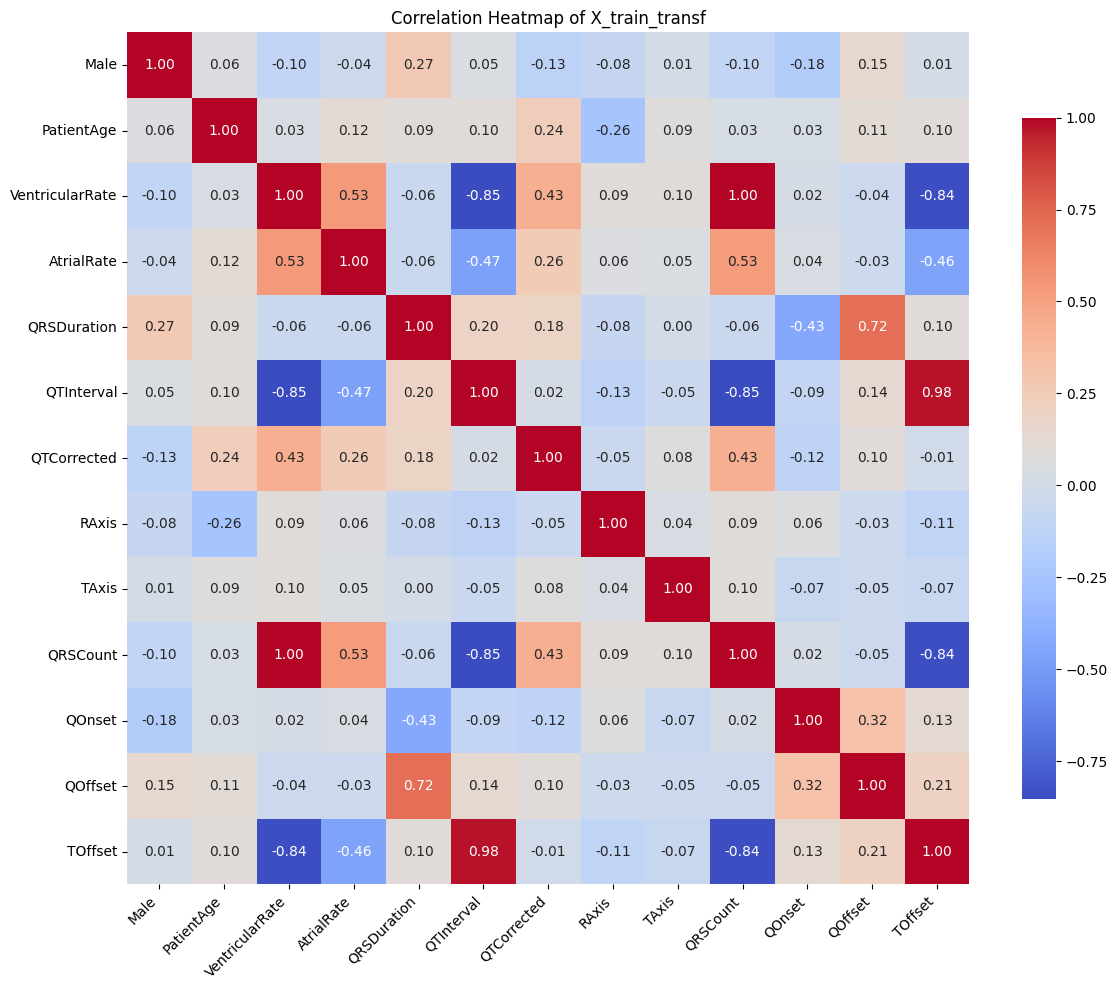

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# heatmap
sns.heatmap(df_X_train_final.corr(), annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={'size': 10}, cbar_kws={'shrink': 0.8})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of X_train_transf')
plt.tight_layout()
plt.show()

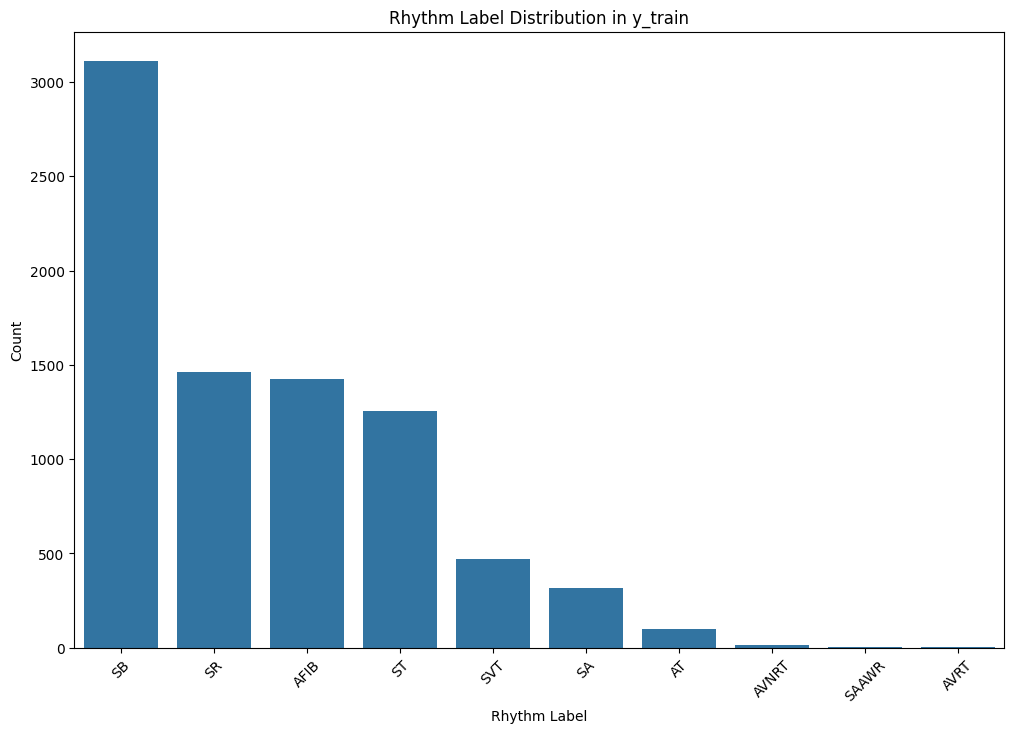

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

rhythm_counts = df_y_train_final.sum(axis=0).sort_index()

# Convert to DataFrame and reset index
rhythm_counts_df = rhythm_counts.reset_index()
rhythm_counts_df.columns = ['Rhythm Label', 'Count']
rhythm_counts_df = rhythm_counts_df.sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Rhythm Label', y='Count', data=rhythm_counts_df)

plt.title("Rhythm Label Distribution in y_train")
plt.xlabel("Rhythm Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Model Selection

Try a multinomial logistic regression?
- Note: multivariate logistic regression = different and predicts dif things
- ALSO: check whether GD = required

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

rseed = 0 # for training reproducibility

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=rseed)

# Train the model on X_train_transf and y_train_transf
y_train_labels = np.argmax(y_train_transf, axis=1)  # Get class labels from one-hot encoding

model.fit(X_train_transf, y_train_labels)

# Model Evaluation
- logistic regression version

In [ ]:
y_pred = model.predict(X_train_transf)

# Calculate accuracy
accuracy = accuracy_score(y_train_labels, y_pred)
print(f"Training Accuracy: {accuracy:.2f}")

In [ ]:
# balanced accuracy
from sklearn.metrics import balanced_accuracy_score

def print_balanced_accuracy(y_test, y_pred):
  bacc = balanced_accuracy_score(y_test, y_pred)
  print('Balance Accuracy:', bacc)

print_balanced_accuracy(y_train_labels, y_pred)

In [ ]:
# Display count the occurrences of each rhythm BUT AF
# NOTE: HORRIBLE WAY TO IMPLEMENT CHANGE FOR OFFICIAL VISUALIZATION <<

df_filtered_rhythm = df_diagnostics[df_diagnostics['Rhythm'] != 'AF']
rhythm_counts = df_filtered_rhythm['Rhythm'].value_counts()
sorted_rhythm_counts = rhythm_counts.sort_index()
print(sorted_rhythm_counts)

In [ ]:
from sklearn.metrics import precision_score, recall_score, fbeta_score
import pandas as pd

# Calculate metrics
p = precision_score(y_train_labels, y_pred, average=None)
r = recall_score(y_train_labels, y_pred, average=None)
f1 = fbeta_score(y_train_labels, y_pred, beta=1.0, average=None)

metrics_df = pd.DataFrame({
    'Rhythm': y_labels,
    'Counts': sorted_rhythm_counts,
    'Precision': p,
    'Recall': r,
    'F1-Score': f1
})

# Sort rows by F1-Score in descending order
metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

print(f"Training Accuracy: {accuracy:.2f}")
print_balanced_accuracy(y_train_labels, y_pred)
print()
print(metrics_df)